## Libraries

In [350]:
#Lib import
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime, timedelta
from scipy.optimize import minimize
import seaborn as sns

In [349]:
# Additional instalations
#pip install seaborn
#pip install yfinance

Instructions

Compute daily returns if not already done so

Perform a short exploratory analysis of your data. Discuss the expected values, covariances
and auto-covariances of your returns, How these characteristics change in time? 

## Data preprocessing

In [268]:
def download_stock_data(stock_files, output_dir):
    """
    Download historical stock data using yfinance and save to CSV files with consistent date formatting.
    
    Parameters:
    stock_files (dict): Dictionary with stock tickers as keys and output filenames as values
    output_dir (str): Directory to save the CSV files
    """
    # Create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Calculate date range (for the assignment period)
    start_date = '2021-01-01'  # January 1, 2021
    end_date = '2024-10-26'    # October 26, 2024
    
    # Download data for each ticker
    for ticker, filename in stock_files.items():
        try:
            # Get stock data
            stock = yf.Ticker(ticker)
            df = stock.history(start=start_date, end=end_date)
            
            # Convert index to date format without time component
            df.index = df.index.date
            
            # Name the index column
            df.index.name = 'Date'
            
            # Save to CSV
            output_path = os.path.join(output_dir, filename)
            df.to_csv(output_path)
            print(f"Successfully downloaded data for {ticker} to {filename}")
            
        except Exception as e:
            print(f"Error downloading data for {ticker}: {str(e)}")
            
# When reading the CSV files back, use:
# df = pd.read_csv(file_path, parse_dates=True, index_col='Date')

In [115]:
# Define the directory containing your stock data
data_dir = r"C:\Users\Uzivatel\Documents\ds2-hw\Projekt -AnalyzaInvestic\stock_data" #changable

# ABE tickers, all well defined
stock_files = {
    'GOOGL': 'Alphabet A Stock Price History.csv',
    'AMGN': 'Amgen Stock Price History.csv',
    'AVGO': 'Broadcom Stock Price History.csv',
    'DLTR': 'Dollar Tree Stock Price History.csv',
    'ISRG': 'Intuitive Surgical Stock Price History.csv',
    'LULU': 'Lululemon Athletica Stock Price History.csv',
    'QCOM': 'Qualcomm Stock Price History.csv',
    'TXN': 'Texas Instruments Stock Price History.csv',
}

# VNO stocks, SPLK not found
stock_files2 = {
    'SPLK': 'Splunk Stock Price History.csv',
    'TEAM': 'Atlassian Stock Price History.csv',
    'BIDU': 'Baidu Stock Price History.csv',
    'ADBE': 'Adobe Stock Price History.csv',
    'MDLZ': 'Mondelez Stock Price History.csv',
    'AMD': 'AMD Stock Price History.csv',
    'VRSN': 'Verisign Stock Price History.csv',
    'PAYX': 'Paychex Stock Price History.csv',
}

# Dir for risk free asset
risk_free_file = r'C:\Users\Uzivatel\Documents\ds2-hw\Projekt -AnalyzaInvestic\USYields2024.csv'

In [269]:
# Downloading data
stock_data = download_stock_data(stock_files,'stock_data')
#stock_data2 = download_stock_data(stock_files2, 'stock_data2')

Successfully downloaded data for GOOGL to Alphabet A Stock Price History.csv
Successfully downloaded data for AMGN to Amgen Stock Price History.csv
Successfully downloaded data for AVGO to Broadcom Stock Price History.csv
Successfully downloaded data for DLTR to Dollar Tree Stock Price History.csv
Successfully downloaded data for ISRG to Intuitive Surgical Stock Price History.csv
Successfully downloaded data for LULU to Lululemon Athletica Stock Price History.csv
Successfully downloaded data for QCOM to Qualcomm Stock Price History.csv
Successfully downloaded data for TXN to Texas Instruments Stock Price History.csv


In [270]:
# Function to calculate daily returns
def calculate_daily_returns(data):
    """
    Calculates daily returns as the logarithm of the ratio of Price to Open prices.
    """
    data['Daily_Return'] = np.log(data['Close'] / data['Open']) # log(Close/Open)
    return data[['Date', 'Daily_Return']]

Loading data into one table and filter 1 Yr risk free rate with the Date


In [271]:
# Load and process stock data

daily_returns = {} # Table with all daily returns in one place
all_data = {}  # Dictionary with ticker as key

for ticker, file_name in stock_files.items():
    file_path = os.path.join(data_dir, file_name)
    print(f"Processing data for {ticker} from {file_path}...")
    data = pd.read_csv(file_path, parse_dates=['Date'])
    data['Ticker'] = ticker  # Add a column for the ticker
    daily_returns[ticker] = calculate_daily_returns(data).set_index('Date')
    all_data[ticker] = data  # Store the full data in the dictionary

# Combine daily returns into a single DataFrame
combined_returns = pd.concat(
    [df['Daily_Return'].rename(ticker) for ticker, df in daily_returns.items()],
    axis=1
)

Processing data for GOOGL from C:\Users\Uzivatel\Documents\ds2-hw\Projekt -AnalyzaInvestic\stock_data\Alphabet A Stock Price History.csv...
Processing data for AMGN from C:\Users\Uzivatel\Documents\ds2-hw\Projekt -AnalyzaInvestic\stock_data\Amgen Stock Price History.csv...
Processing data for AVGO from C:\Users\Uzivatel\Documents\ds2-hw\Projekt -AnalyzaInvestic\stock_data\Broadcom Stock Price History.csv...
Processing data for DLTR from C:\Users\Uzivatel\Documents\ds2-hw\Projekt -AnalyzaInvestic\stock_data\Dollar Tree Stock Price History.csv...
Processing data for ISRG from C:\Users\Uzivatel\Documents\ds2-hw\Projekt -AnalyzaInvestic\stock_data\Intuitive Surgical Stock Price History.csv...
Processing data for LULU from C:\Users\Uzivatel\Documents\ds2-hw\Projekt -AnalyzaInvestic\stock_data\Lululemon Athletica Stock Price History.csv...
Processing data for QCOM from C:\Users\Uzivatel\Documents\ds2-hw\Projekt -AnalyzaInvestic\stock_data\Qualcomm Stock Price History.csv...
Processing data f

In [274]:
import pandas as pd

# Preprocessing of risk_free_file
risk_free_rate = pd.read_csv(risk_free_file)

# Remove leading/trailing spaces from column names
risk_free_rate.columns = risk_free_rate.columns.str.strip()

# Convert Date column to datetime format with dayfirst=True
risk_free_rate['Date'] = pd.to_datetime(risk_free_rate['Date'], dayfirst=True, errors='coerce')

# Ensure the '1 Mo' column is numeric and handle missing values
risk_free_rate['1 Mo'] = pd.to_numeric(risk_free_rate['1 Mo'], errors='coerce')

# Check if 'Date' column exists and proceed
if 'Date' in risk_free_rate.columns:
    # Filter columns
    risk_free_rate = risk_free_rate[['Date', '1 Mo']].dropna()

    # Filter date range
    mask = (risk_free_rate['Date'] >= '2021-01-01') & (risk_free_rate['Date'] <= '2024-10-25')
    risk_free_rate = risk_free_rate.loc[mask]

    # Convert the annualized rate into a daily rate (assuming 252 trading days in a year)
    risk_free_rate['Daily_Risk_Free_Rate'] = (1 + risk_free_rate['1 Mo'] / 100) ** (1 / 252) - 1 #????

    # Set the 'Date' column as the index for alignment with stock data
    risk_free_rate.set_index('Date', inplace=True)

    print("\nRisk-Free Rate Data (Head):")
    print(risk_free_rate.head())
    print(risk_free_rate.tail())
    print("\nDate range in the data:")
    print(f"Start date: {risk_free_rate.index.min()}")
    print(f"End date: {risk_free_rate.index.max()}")

    # Save the processed risk-free rate for later use
    risk_free_rate.to_csv('processed_risk_free_rate.csv')
    print("Risk-free rate processing complete. File saved as 'processed_risk_free_rate.csv'.")
else:
    print("The 'Date' column is missing or misnamed.")



Risk-Free Rate Data (Head):
            1 Mo  Daily_Risk_Free_Rate
Date                                  
2021-01-04  0.09              0.000004
2021-01-05  0.08              0.000003
2021-01-06  0.09              0.000004
2021-01-07  0.09              0.000004
2021-01-08  0.08              0.000003
            1 Mo  Daily_Risk_Free_Rate
Date                                  
2024-10-21  4.92              0.000191
2024-10-22  4.89              0.000189
2024-10-23  4.88              0.000189
2024-10-24  4.87              0.000189
2024-10-25  4.89              0.000189

Date range in the data:
Start date: 2021-01-04 00:00:00
End date: 2024-10-25 00:00:00
Risk-free rate processing complete. File saved as 'processed_risk_free_rate.csv'.


In [43]:
# Save processed data for further analysis
#combined_returns.to_csv('daily_returns.csv')
#risk_free_rate.to_csv('risk_free_rate.csv')

#("Data processing complete. Files saved as 'daily_returns.csv' and 'risk_free_rate.csv'.")

Data processing complete. Files saved as 'daily_returns.csv' and 'risk_free_rate.csv'.


In [275]:
def compare_and_clean_dates(combined_returns, risk_free_rate):
    """
    Compare and clean dates between two dataframes, removing time components
    and handling timezone differences.
    
    Parameters:
    combined_returns (pd.DataFrame): DataFrame with potential timezone-aware dates
    risk_free_rate (pd.DataFrame): DataFrame with datetime index
    
    Returns:
    tuple: (missing_dates, cleaned_combined_returns, cleaned_risk_free_rate)
    """
    # Convert combined returns dates - handle timezone aware dates
    combined_dates = combined_returns.index.tz_localize(None)  # Remove timezone first
    combined_dates = pd.to_datetime(combined_dates).date  # Then convert to date
    
    # Convert risk free dates
    risk_free_dates = pd.to_datetime(risk_free_rate.index).date
    
    # Find missing dates
    combined_dates_set = set(combined_dates)
    risk_free_dates_set = set(risk_free_dates)
    missing_dates = sorted(combined_dates_set - risk_free_dates_set)
    missing_dates2 = sorted(risk_free_dates_set- combined_dates_set )
    
    # Create new DataFrames with clean dates
    cleaned_combined_returns = combined_returns.copy()
    cleaned_combined_returns.index = combined_dates
    
    cleaned_risk_free_rate = risk_free_rate.copy()
    cleaned_risk_free_rate.index = risk_free_dates
    
    return missing_dates, missing_dates2, cleaned_combined_returns, cleaned_risk_free_rate



In [276]:
# Usage example:
missing_dates, missing_dates2, clean_returns, clean_risk_free = compare_and_clean_dates(combined_returns, risk_free_rate)
# Cleaning combined
#combined_returns_cleaned = combined_returns[~combined_returns.index.isin(missing_dates)]
# Print missing dates
print("Missing Dates in Risk-Free Rate Data:")
for date in missing_dates:
    print(date)
print("Missing Dates in Combo Rate Data:")
for date in missing_dates2:
    print(date)

# Print sample of cleaned dates
print("\nSample of Cleaned Combined Returns Dates:")
print(clean_returns.index[:5])
print("\nSample of Cleaned Risk-Free Dates:")
print(clean_risk_free.index[:5])

Missing Dates in Risk-Free Rate Data:
2021-10-11
2021-11-11
2022-10-10
2022-11-11
2023-10-09
2024-10-14
Missing Dates in Combo Rate Data:
2021-04-02
2023-04-07

Sample of Cleaned Combined Returns Dates:
Index([2021-01-04, 2021-01-05, 2021-01-06, 2021-01-07, 2021-01-08], dtype='object')

Sample of Cleaned Risk-Free Dates:
Index([2021-01-04, 2021-01-05, 2021-01-06, 2021-01-07, 2021-01-08], dtype='object')


In [277]:
# Ensure missing_dates are datetime64[ns]
missing_dates = pd.to_datetime(missing_dates)

# Now apply to combined_returns
combined_returns_cleaned = combined_returns[~combined_returns.index.isin(missing_dates)]

# Similarly for risk_free_rate
missing_dates2 = pd.to_datetime(missing_dates2)
risk_free_rate_cleaned = risk_free_rate[~risk_free_rate.index.isin(missing_dates2)]

## Exploratory Analysis

In [278]:
# Summary of Risk-Free Rate and combined Results
print("\nDaily Returns Summary:")
print(combined_returns_cleaned.describe())

print("\nRisk-Free Rate Summary:")
print(risk_free_rate_cleaned.describe())


Daily Returns Summary:
            GOOGL        AMGN        AVGO        DLTR        ISRG        LULU  \
count  954.000000  954.000000  954.000000  954.000000  954.000000  954.000000   
mean     0.000614   -0.000123    0.000411   -0.000019    0.000066   -0.000671   
std      0.014786    0.011604    0.019039    0.017194    0.016509    0.018766   
min     -0.053584   -0.064270   -0.084262   -0.135594   -0.085994   -0.082647   
25%     -0.008382   -0.006930   -0.010506   -0.009412   -0.008296   -0.011803   
50%      0.001085   -0.000416    0.000553   -0.000258    0.001132   -0.000167   
75%      0.009710    0.006681    0.011612    0.009503    0.009623    0.010160   
max      0.063041    0.036010    0.091860    0.083331    0.079956    0.082511   

             QCOM         TXN  
count  954.000000  954.000000  
mean    -0.000210   -0.000044  
std      0.018864    0.014220  
min     -0.078268   -0.053501  
25%     -0.011304   -0.008763  
50%      0.000531    0.000203  
75%      0.011013    0

In [279]:
print("\n First 5 rows")
print(combined_returns_cleaned.head())
print("\n Last 5 rows")
print(risk_free_rate_cleaned.tail())


 First 5 rows
               GOOGL      AMGN      AVGO      DLTR      ISRG      LULU  \
Date                                                                     
2021-01-04 -0.019432 -0.020048 -0.032644 -0.006431 -0.031789  0.013360   
2021-01-05  0.008635  0.003607  0.007150  0.007684  0.013959  0.023773   
2021-01-06  0.013216  0.036010  0.005090  0.055228 -0.003136  0.003143   
2021-01-07  0.027182  0.009273  0.025885  0.015457  0.011624  0.001144   
2021-01-08  0.011564  0.012489 -0.003047 -0.015372  0.017906 -0.005185   

                QCOM       TXN  
Date                            
2021-01-04 -0.029918 -0.014565  
2021-01-05  0.025111  0.010520  
2021-01-06 -0.002246  0.011761  
2021-01-07  0.021882  0.015663  
2021-01-08 -0.003759  0.000234  

 Last 5 rows
            1 Mo  Daily_Risk_Free_Rate
Date                                  
2024-10-21  4.92              0.000191
2024-10-22  4.89              0.000189
2024-10-23  4.88              0.000189
2024-10-24  4.87          

In [280]:
# Exploratory analysis

print("Performing exploratory analysis...")
mean_returns = combined_returns_cleaned.mean()
cov_matrix = combined_returns_cleaned.cov()
auto_cov = combined_returns_cleaned.apply(lambda col: col.autocorr())

print("\nExpected Returns (Mean):")
print(mean_returns)
print("\nCovariance Matrix:")
print(cov_matrix)
print("\nAuto-covariances (Autocorrelations):")
print(auto_cov)

Performing exploratory analysis...

Expected Returns (Mean):
GOOGL    0.000614
AMGN    -0.000123
AVGO     0.000411
DLTR    -0.000019
ISRG     0.000066
LULU    -0.000671
QCOM    -0.000210
TXN     -0.000044
dtype: float64

Covariance Matrix:
          GOOGL      AMGN      AVGO      DLTR      ISRG      LULU      QCOM  \
GOOGL  0.000219  0.000030  0.000141  0.000048  0.000120  0.000128  0.000149   
AMGN   0.000030  0.000135  0.000040  0.000044  0.000045  0.000032  0.000037   
AVGO   0.000141  0.000040  0.000362  0.000066  0.000142  0.000160  0.000246   
DLTR   0.000048  0.000044  0.000066  0.000296  0.000058  0.000094  0.000069   
ISRG   0.000120  0.000045  0.000142  0.000058  0.000273  0.000141  0.000148   
LULU   0.000128  0.000032  0.000160  0.000094  0.000141  0.000352  0.000164   
QCOM   0.000149  0.000037  0.000246  0.000069  0.000148  0.000164  0.000356   
TXN    0.000105  0.000044  0.000173  0.000056  0.000100  0.000124  0.000188   

            TXN  
GOOGL  0.000105  
AMGN   0.000

#TBD
The expected returns show the average daily log returns for the assets. GOOGL and AVGO exhibit positive expected returns, indicating slight daily growth, while other assets, such as LULU and AMGN, have negative expected returns, suggesting slight daily losses. The covariance matrix highlights relationships in return variability between assets. For example, GOOGL and AVGO have a relatively high covariance (0.000141), suggesting they tend to move together. On the other hand, the autocovariances (or autocorrelations) suggest the persistence of daily returns over time; for instance, GOOGL and AMGN show slight positive autocorrelations, while TXN and DLTR exhibit notable negative autocorrelations.

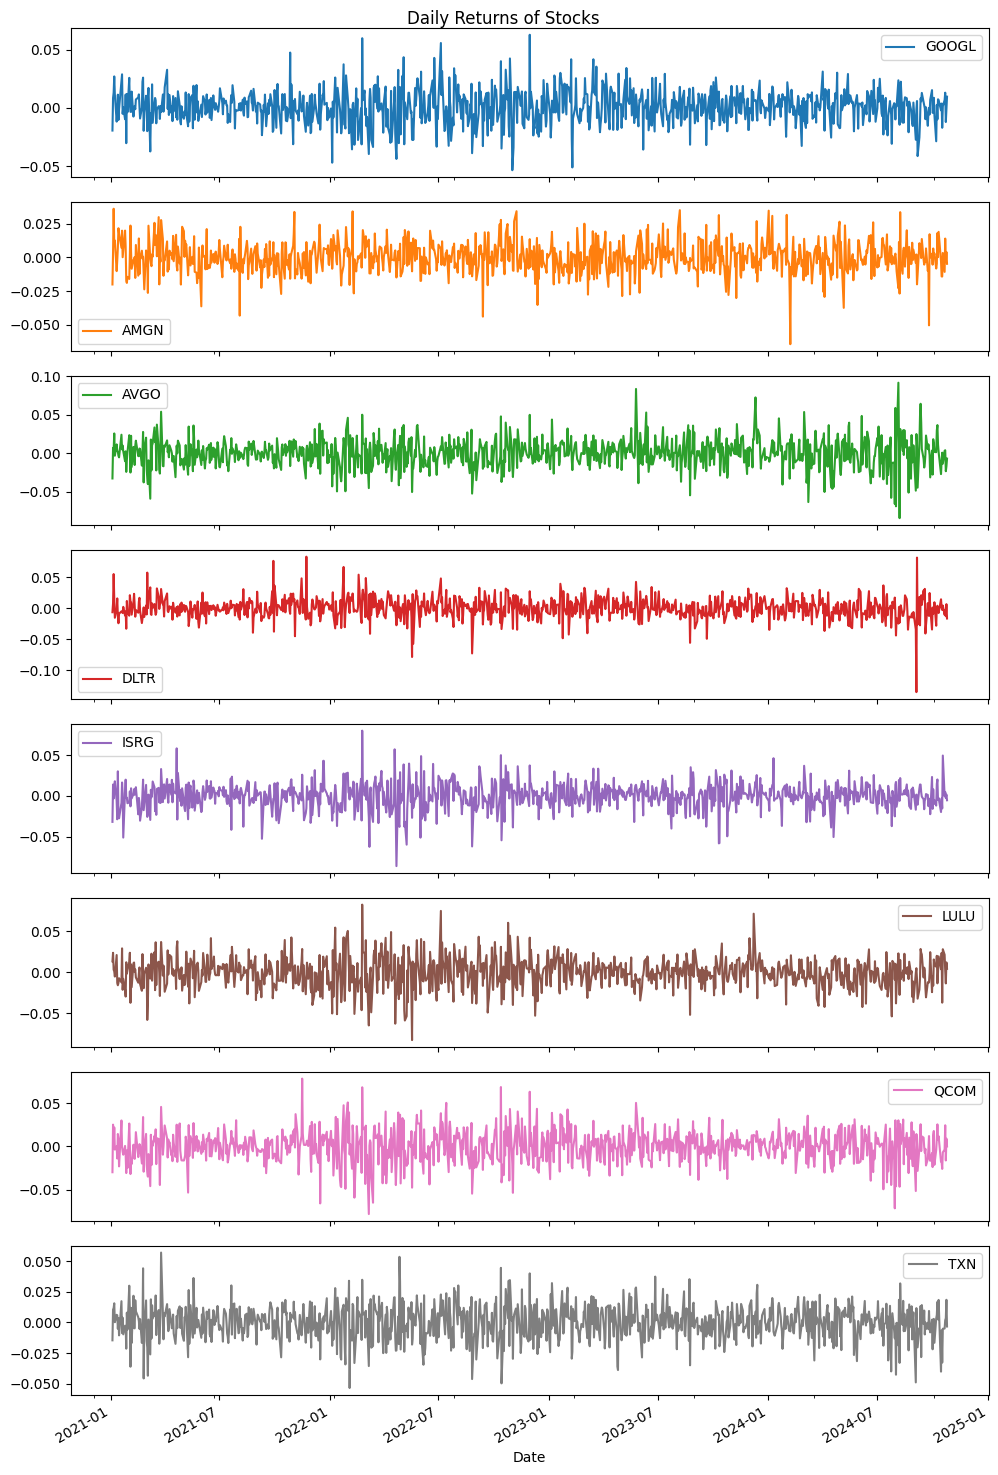

In [282]:
# Plotting daily returns
combined_returns_cleaned.plot(subplots=True, figsize=(10, 15), title='Daily Returns of Stocks')
plt.tight_layout()
plt.show()

Some of them are showing homoscedascity and low autocovariance, and centered around 0.
#TODO: Mrknout na časové řady cvika a vyjmenovat různé ty vlastnosti a possibly dodělat nějaké grafy

In [39]:
combined_returns.info()
combined_returns.shape

<class 'pandas.core.frame.DataFrame'>
Index: 959 entries, 2021-01-04 00:00:00-05:00 to 2024-10-24 00:00:00-04:00
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GOOGL   959 non-null    float64
 1   AMGN    959 non-null    float64
 2   AVGO    959 non-null    float64
 3   DLTR    959 non-null    float64
 4   ISRG    959 non-null    float64
 5   LULU    959 non-null    float64
 6   QCOM    959 non-null    float64
 7   TXN     959 non-null    float64
dtypes: float64(8)
memory usage: 99.7+ KB


(959, 8)

In [152]:
def explore_data(stock_data):
    """
    Explore the downloaded stock data with various analyses.
    
    Parameters:
    stock_data (dict): Dictionary with stock tickers as keys and pandas DataFrames as values
    """
    print("\n=== Data Exploration ===")
    
    for ticker, df in stock_data.items():
        print(f"\nAnalysis for {ticker}:")
        print("-" * 50)
        
        # Basic info
        print("\nDataset Info:")
        print(df.info())
        
        # Summary statistics
        print("\nSummary Statistics:")
        print(df.describe())
        
        # Check for missing values
        missing = df.isnull().sum()
        if missing.any():
            print("\nMissing Values:")
            print(missing[missing > 0])
        
        # Calculate daily returns
        df['Daily_Return'] = np.log(df['Close']) - np.log(df['Open'])
        
        # Basic metrics
        print("\nKey Metrics:")
        print(f"Total Trading Days: {len(df)}")
        print(f"Average Daily Volume: {df['Volume'].mean():,.0f}")
        print(f"Average Daily Return: {df['Daily_Return'].mean():.4%}")
        print(f"Return Volatility: {df['Daily_Return'].std():.4%}")
        print(f"Maximum Daily Gain: {df['Daily_Return'].max():.4%}")
        print(f"Maximum Daily Loss: {df['Daily_Return'].min():.4%}")
        
        # Plot price history
        plt.figure(figsize=(12, 6))
        plt.plot(df.index, df['Close'])
        plt.title(f'{ticker} Stock Price History')
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.grid(True)
        plt.show()
        
        # Plot daily returns distribution
        plt.figure(figsize=(10, 6))
        sns.histplot(df['Daily_Return'], kde=True)
        plt.title(f'{ticker} Daily Returns Distribution')
        plt.xlabel('Daily Return')
        plt.ylabel('Frequency')
        plt.show()

In [142]:
all_data['GOOGL'] #all data in one frame (disctionary)
#combined_returns #This one is more important

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker,Daily_Return
0,2021-01-04,87.682146,87.806193,85.048695,85.994766,37324000,0.0,0.0,GOOGL,-0.019432
1,2021-01-05,85.942956,87.026028,85.534935,86.688255,20360000,0.0,0.0,GOOGL,0.008635
2,2021-01-06,84.705928,86.883535,84.498680,85.832840,46588000,0.0,0.0,GOOGL,0.013216
3,2021-01-07,86.026141,88.569921,86.026141,88.396553,41936000,0.0,0.0,GOOGL,0.027182
4,2021-01-08,88.537043,89.643034,87.742917,89.566811,35484000,0.0,0.0,GOOGL,0.011564
...,...,...,...,...,...,...,...,...,...,...
954,2024-10-18,163.003193,164.521457,162.893318,163.232925,19757700,0.0,0.0,GOOGL,0.001408
955,2024-10-21,162.763459,164.311687,162.433835,163.882187,20946500,0.0,0.0,GOOGL,0.006850
956,2024-10-22,162.793427,165.580242,162.793427,164.950958,16568100,0.0,0.0,GOOGL,0.013166
957,2024-10-23,164.571388,165.630187,161.744625,162.593658,18280500,0.0,0.0,GOOGL,-0.012090



=== Data Exploration ===

Analysis for GOOGL:
--------------------------------------------------

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          959 non-null    datetime64[ns]
 1   Open          959 non-null    float64       
 2   High          959 non-null    float64       
 3   Low           959 non-null    float64       
 4   Close         959 non-null    float64       
 5   Volume        959 non-null    int64         
 6   Dividends     959 non-null    float64       
 7   Stock Splits  959 non-null    float64       
 8   Ticker        959 non-null    object        
 9   Daily_Return  959 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 75.0+ KB
None

Summary Statistics:
                                Date        Open        High         Low  

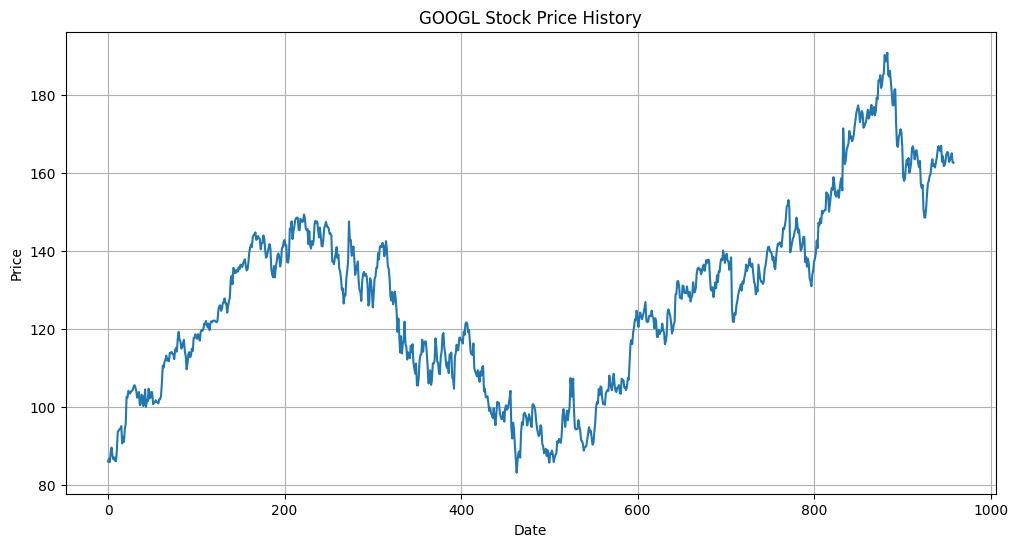

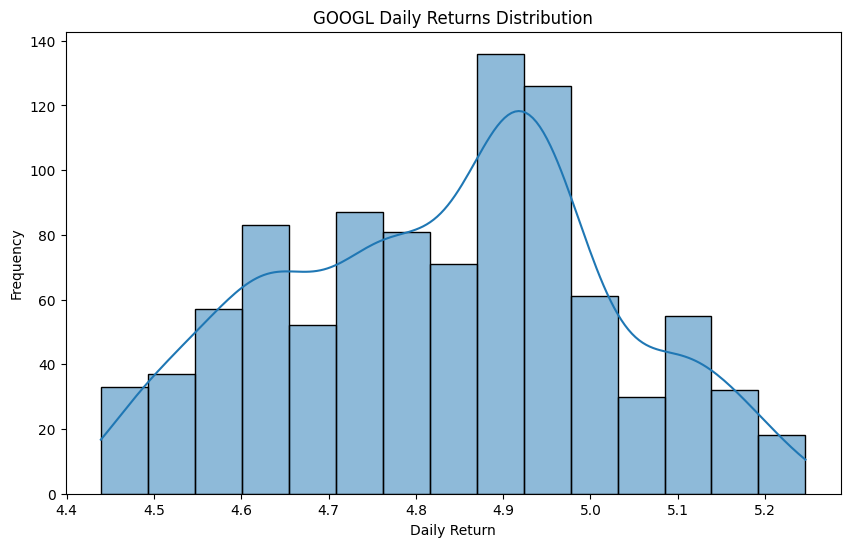


Analysis for AMGN:
--------------------------------------------------

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          959 non-null    datetime64[ns]
 1   Open          959 non-null    float64       
 2   High          959 non-null    float64       
 3   Low           959 non-null    float64       
 4   Close         959 non-null    float64       
 5   Volume        959 non-null    int64         
 6   Dividends     959 non-null    float64       
 7   Stock Splits  959 non-null    float64       
 8   Ticker        959 non-null    object        
 9   Daily_Return  959 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 75.0+ KB
None

Summary Statistics:
                                Date        Open        High         Low  \
count                    

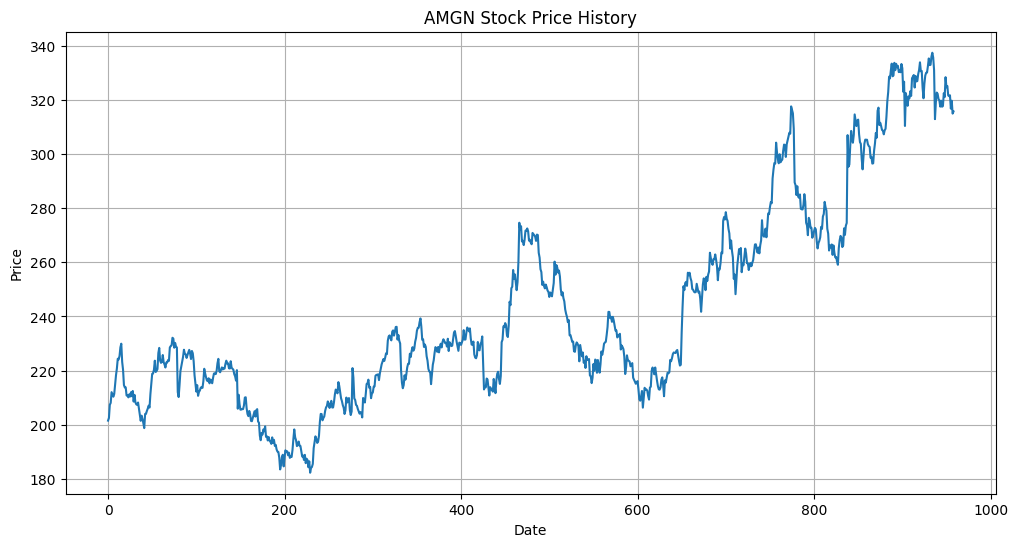

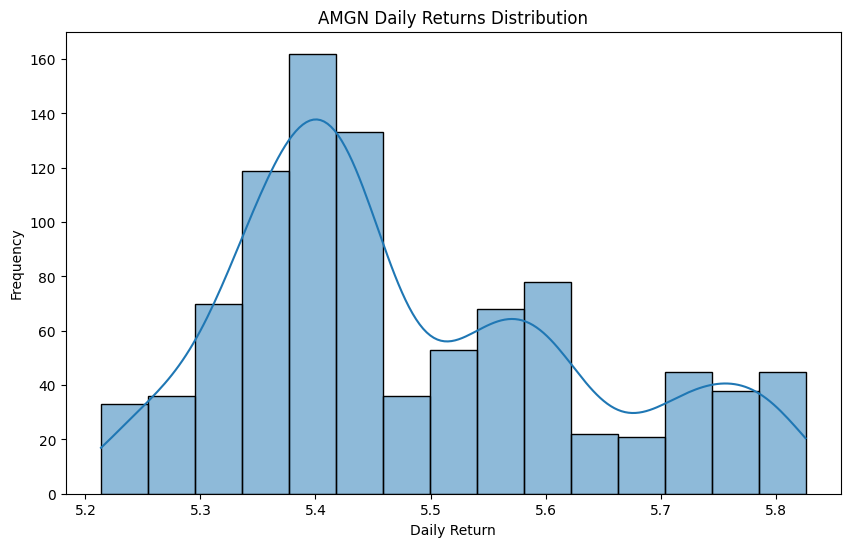


Analysis for AVGO:
--------------------------------------------------

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          959 non-null    datetime64[ns]
 1   Open          959 non-null    float64       
 2   High          959 non-null    float64       
 3   Low           959 non-null    float64       
 4   Close         959 non-null    float64       
 5   Volume        959 non-null    int64         
 6   Dividends     959 non-null    float64       
 7   Stock Splits  959 non-null    float64       
 8   Ticker        959 non-null    object        
 9   Daily_Return  959 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 75.0+ KB
None

Summary Statistics:
                                Date        Open        High         Low  \
count                    

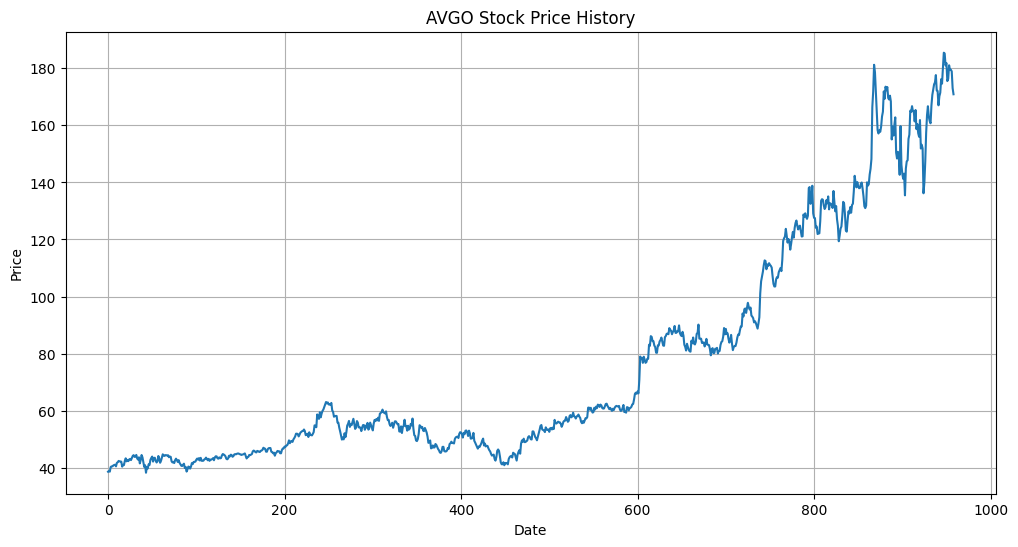

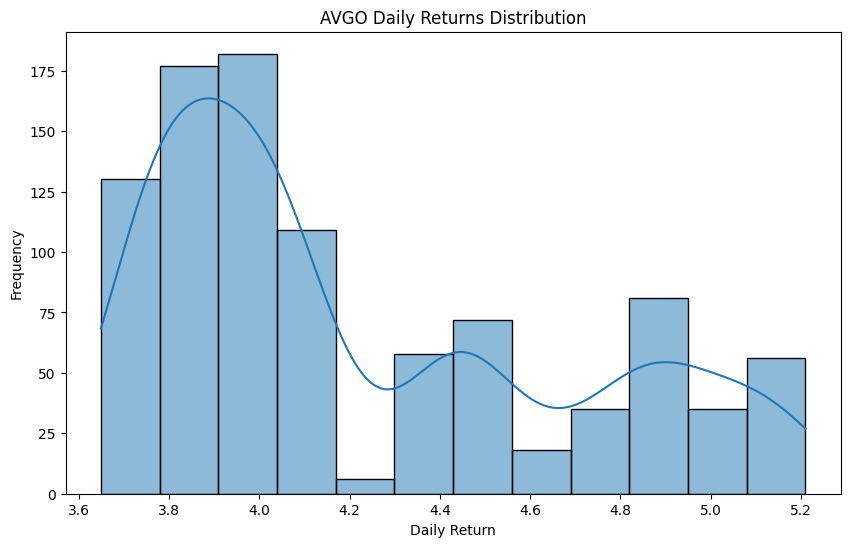


Analysis for DLTR:
--------------------------------------------------

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          959 non-null    datetime64[ns]
 1   Open          959 non-null    float64       
 2   High          959 non-null    float64       
 3   Low           959 non-null    float64       
 4   Close         959 non-null    float64       
 5   Volume        959 non-null    int64         
 6   Dividends     959 non-null    float64       
 7   Stock Splits  959 non-null    float64       
 8   Ticker        959 non-null    object        
 9   Daily_Return  959 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 75.0+ KB
None

Summary Statistics:
                                Date        Open        High         Low  \
count                    

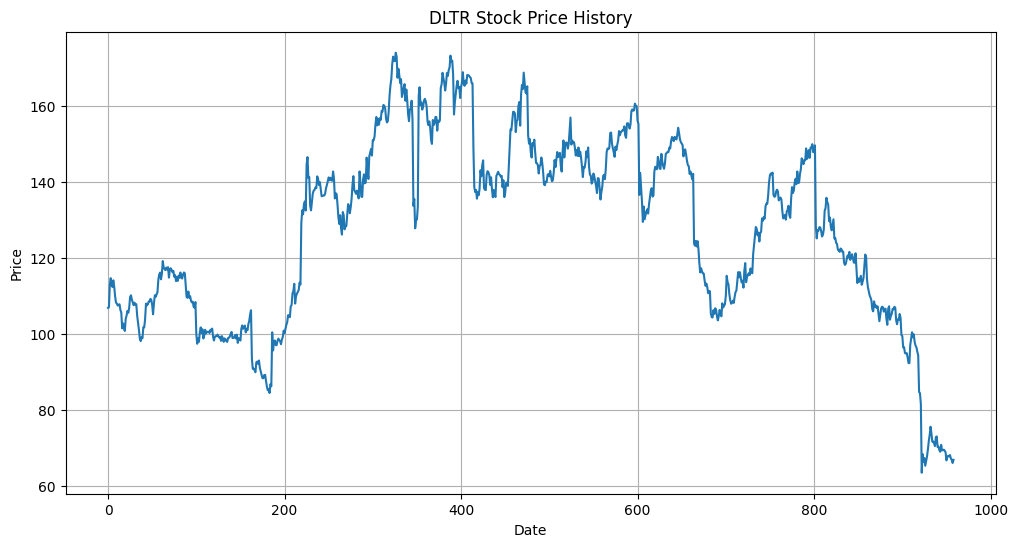

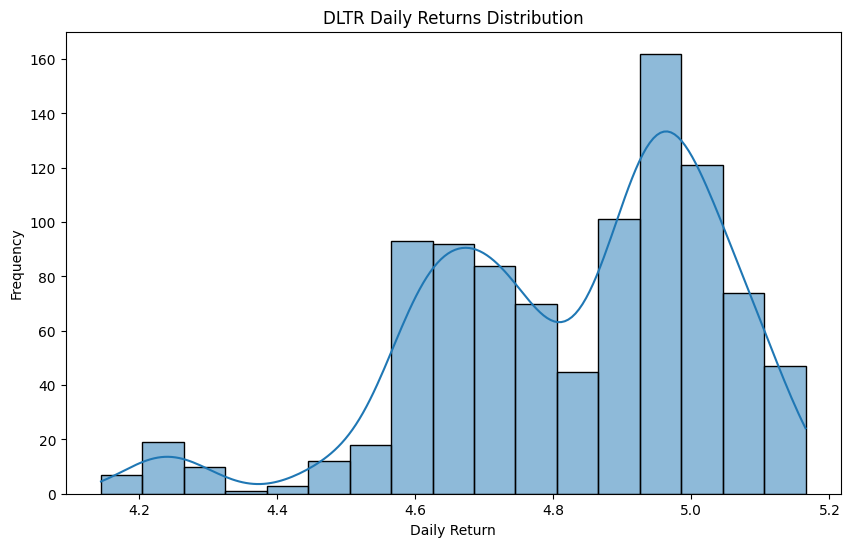


Analysis for ISRG:
--------------------------------------------------

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          959 non-null    datetime64[ns]
 1   Open          959 non-null    float64       
 2   High          959 non-null    float64       
 3   Low           959 non-null    float64       
 4   Close         959 non-null    float64       
 5   Volume        959 non-null    int64         
 6   Dividends     959 non-null    float64       
 7   Stock Splits  959 non-null    float64       
 8   Ticker        959 non-null    object        
 9   Daily_Return  959 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 75.0+ KB
None

Summary Statistics:
                                Date        Open        High         Low  \
count                    

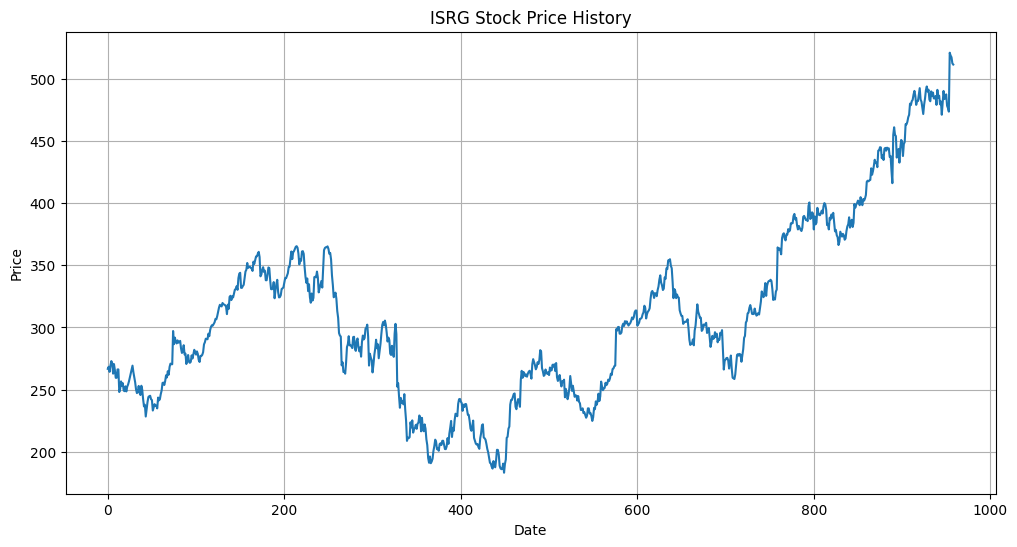

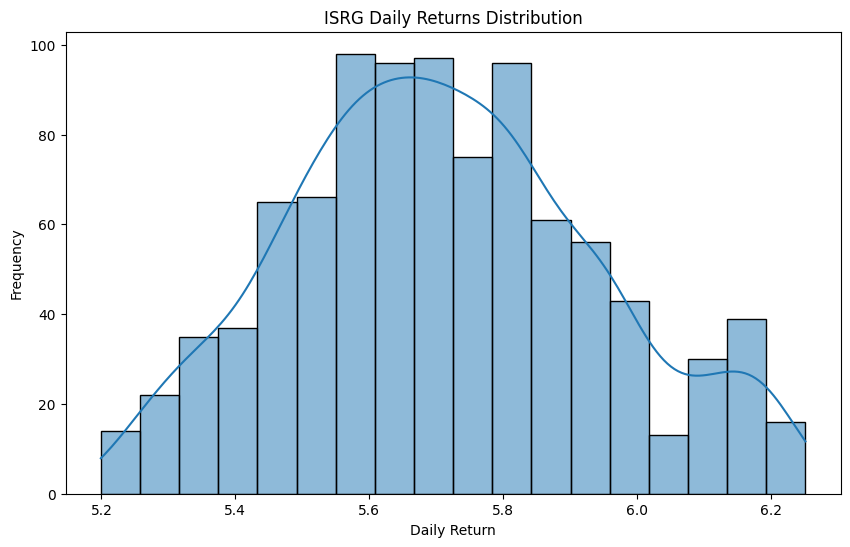


Analysis for LULU:
--------------------------------------------------

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          959 non-null    datetime64[ns]
 1   Open          959 non-null    float64       
 2   High          959 non-null    float64       
 3   Low           959 non-null    float64       
 4   Close         959 non-null    float64       
 5   Volume        959 non-null    int64         
 6   Dividends     959 non-null    float64       
 7   Stock Splits  959 non-null    float64       
 8   Ticker        959 non-null    object        
 9   Daily_Return  959 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 75.0+ KB
None

Summary Statistics:
                                Date        Open        High         Low  \
count                    

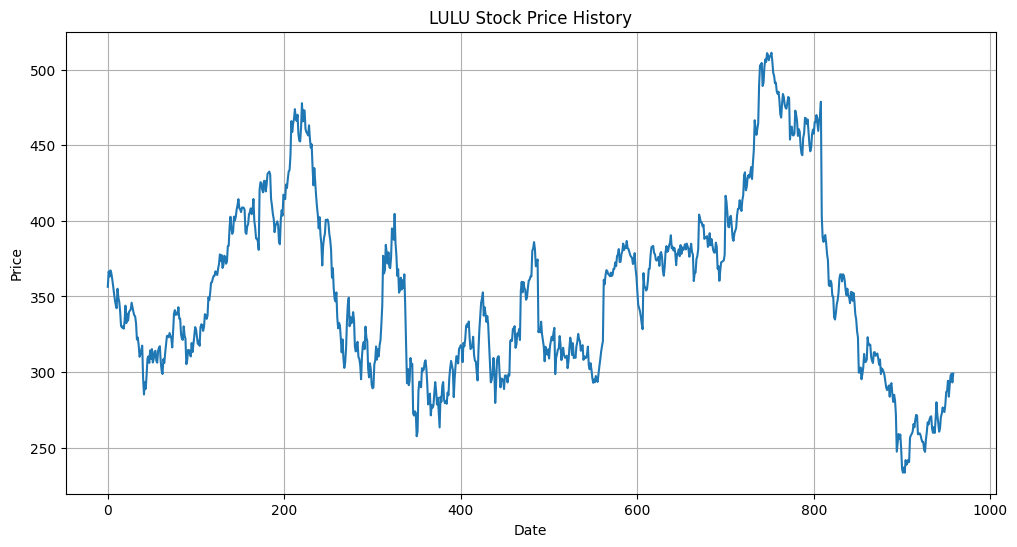

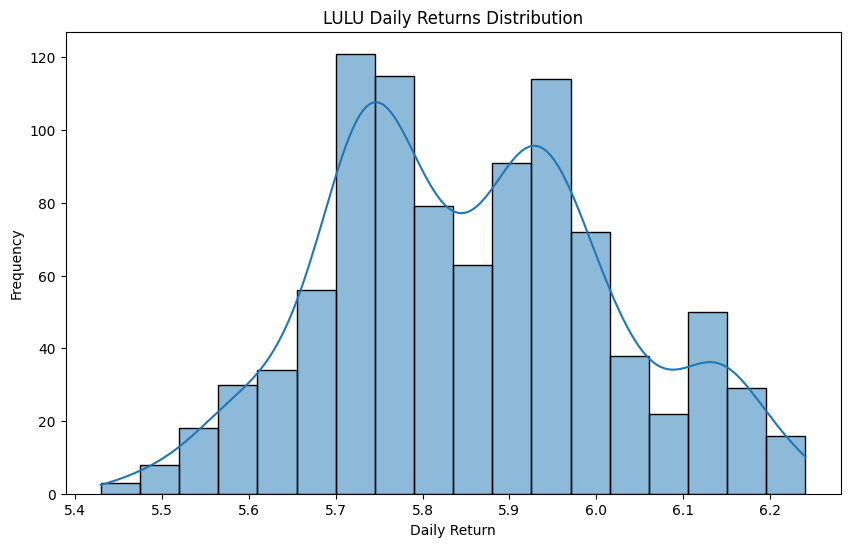


Analysis for QCOM:
--------------------------------------------------

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          959 non-null    datetime64[ns]
 1   Open          959 non-null    float64       
 2   High          959 non-null    float64       
 3   Low           959 non-null    float64       
 4   Close         959 non-null    float64       
 5   Volume        959 non-null    int64         
 6   Dividends     959 non-null    float64       
 7   Stock Splits  959 non-null    float64       
 8   Ticker        959 non-null    object        
 9   Daily_Return  959 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 75.0+ KB
None

Summary Statistics:
                                Date        Open        High         Low  \
count                    

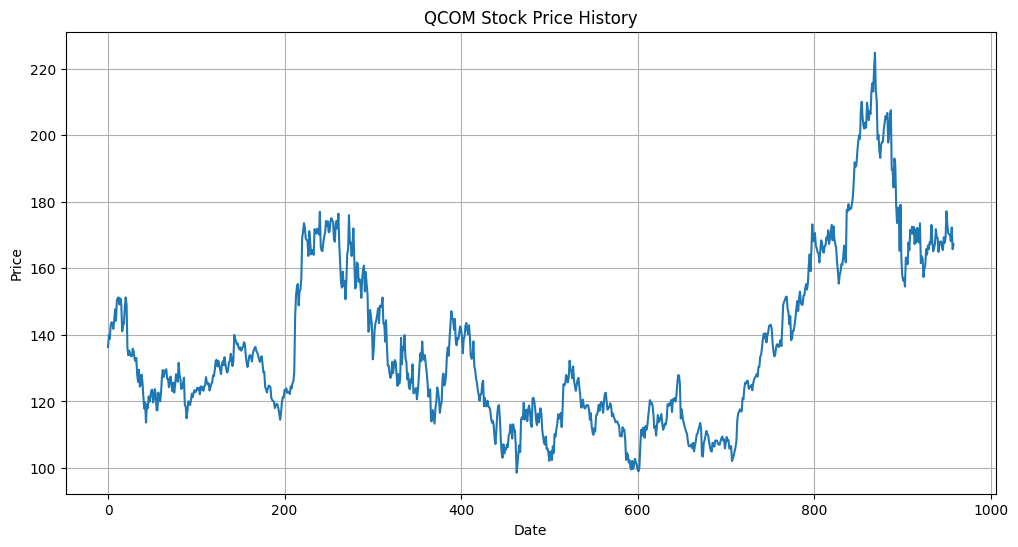

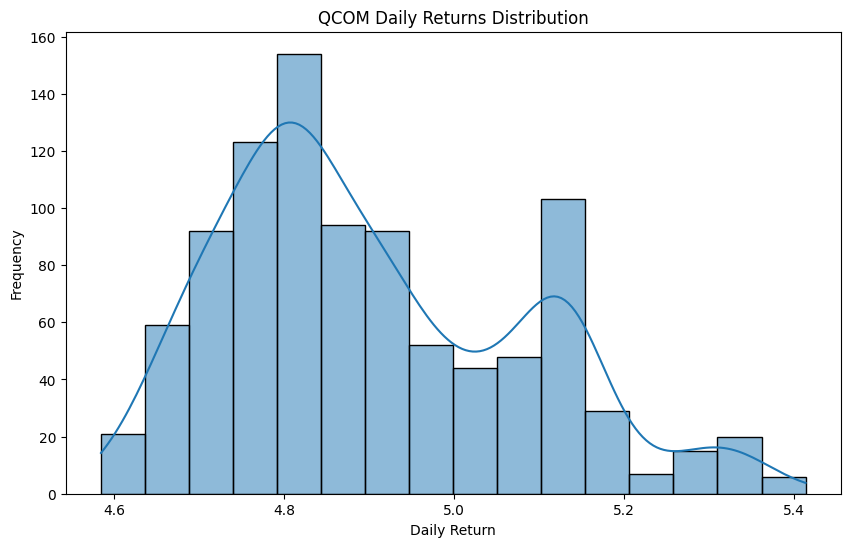


Analysis for TXN:
--------------------------------------------------

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 959 entries, 0 to 958
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          959 non-null    datetime64[ns]
 1   Open          959 non-null    float64       
 2   High          959 non-null    float64       
 3   Low           959 non-null    float64       
 4   Close         959 non-null    float64       
 5   Volume        959 non-null    int64         
 6   Dividends     959 non-null    float64       
 7   Stock Splits  959 non-null    float64       
 8   Ticker        959 non-null    object        
 9   Daily_Return  959 non-null    float64       
dtypes: datetime64[ns](1), float64(7), int64(1), object(1)
memory usage: 75.0+ KB
None

Summary Statistics:
                                Date        Open        High         Low  \
count                     

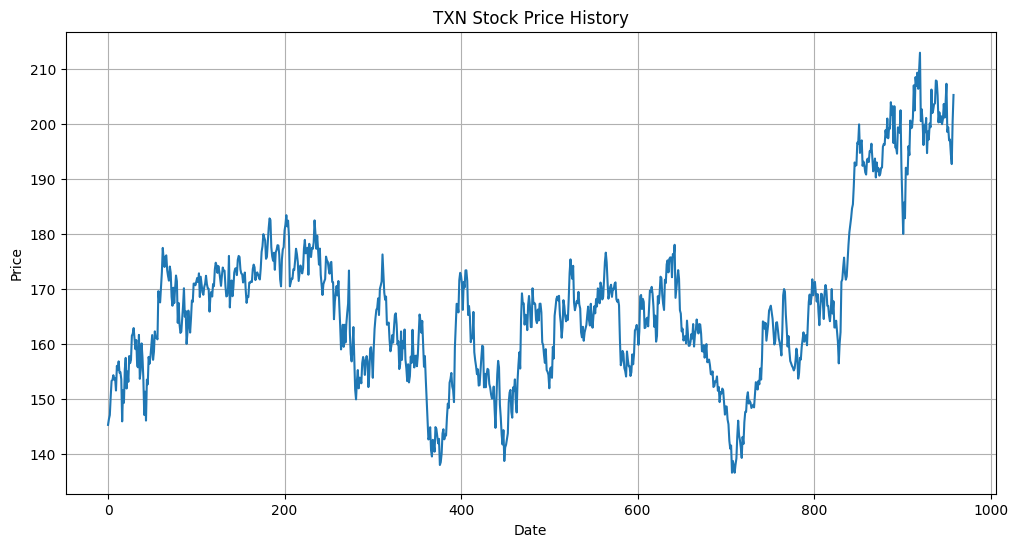

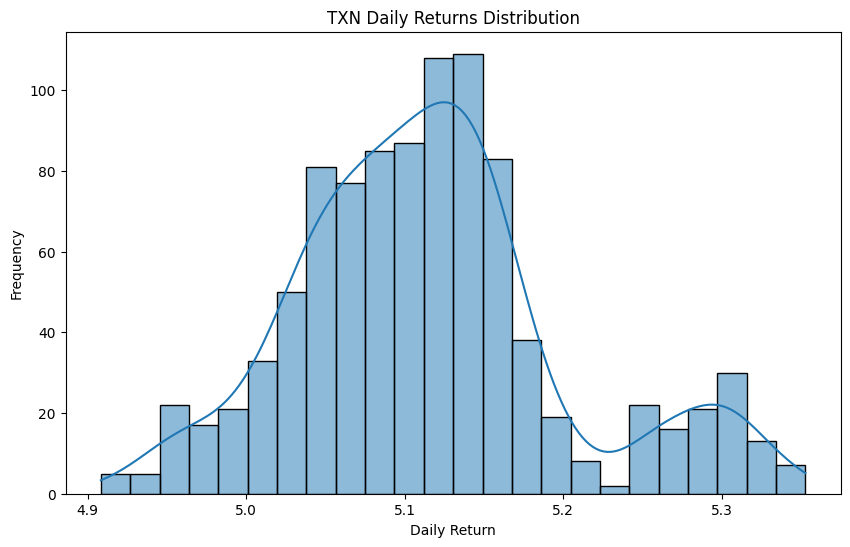

In [163]:
explore_data(all_data)

In [292]:
def plot_stock_data_comparisons(stock_data):
    """
    Plot multiple aspects of stock data for all tickers in the dictionary.
    
    Parameters:
    stock_data (dict): Dictionary with stock tickers as keys and pandas DataFrames as values
    """
    fig, axes = plt.subplots(5, 1, figsize=(14, 20), sharex=True)

    # Plot Open Prices
    for ticker, df in stock_data.items():
        axes[0].plot(df.index, df['Open'], label=ticker)
    axes[0].set_title('Open Prices for All Stocks', fontsize=14)
    axes[0].set_ylabel('Price')
    axes[0].legend(loc='best', fontsize=10)
    axes[0].grid(True)
    
    # Plot Volumes
    for ticker, df in stock_data.items():
        axes[1].plot(df.index, df['Volume'], label=ticker)
    axes[1].set_title('Volumes for All Stocks', fontsize=14)
    axes[1].set_ylabel('Volume')
    axes[1].legend(loc='best', fontsize=10)
    axes[1].grid(True)

    # Plot Low-High Range (Confidence Interval)
    for ticker, df in stock_data.items():
        axes[2].fill_between(df.index, df['Low'], df['High'], alpha=0.3, label=ticker)
    axes[2].set_title('Low-High Range for All Stocks', fontsize=14)
    axes[2].set_ylabel('Price Range')
    axes[2].legend(loc='best', fontsize=10)
    axes[2].grid(True)

    # Plot Dividends
    for ticker, df in stock_data.items():
        axes[3].plot(df.index, df['Dividends'], label=ticker)
    axes[3].set_title('Dividends for All Stocks', fontsize=14)
    axes[3].set_ylabel('Dividends')
    axes[3].legend(loc='best', fontsize=10)
    axes[3].grid(True)

    # Plot Daily Returns
    for ticker, df in stock_data.items():
        axes[4].plot(df.index, df['Daily_Return'], label=ticker)
    axes[4].set_title('Daily Returns for All Stocks', fontsize=14)
    axes[4].set_ylabel('Daily Return')
    axes[4].legend(loc='best', fontsize=10)
    axes[4].grid(True)

    # Adjust layout and show plot
    plt.xlabel('Date', fontsize=12)
    plt.tight_layout()
    plt.show()


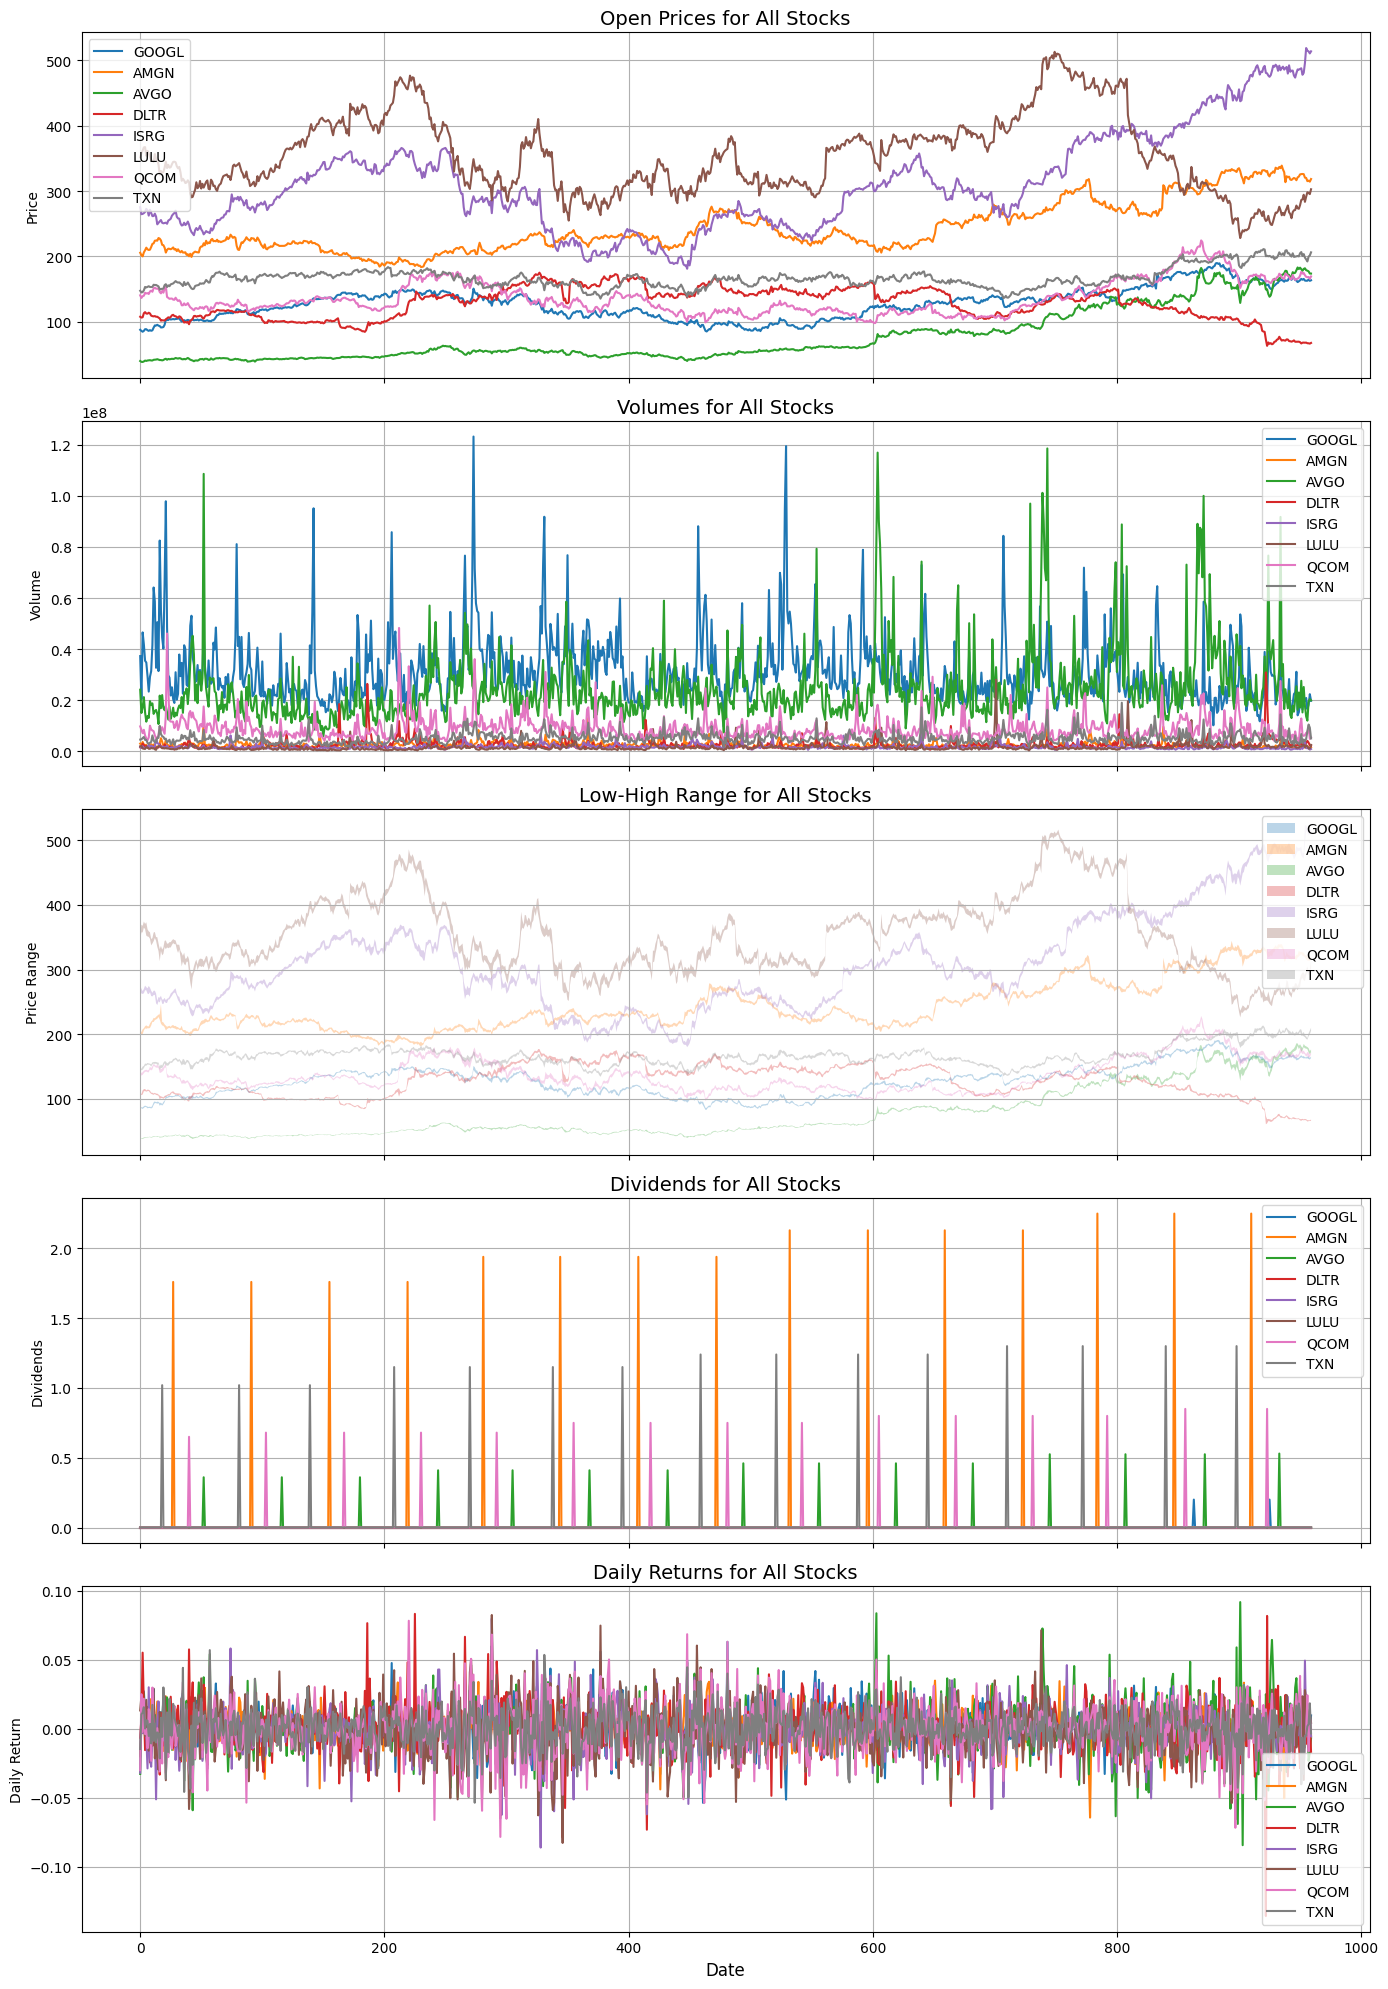

In [293]:
plot_stock_data_comparisons(all_data)

# Efficient Portfolios

In [366]:
combined_returns_cleaned.index = pd.to_datetime(combined_returns_cleaned.index)
risk_free_rate_cleaned.index = pd.to_datetime(risk_free_rate_cleaned.index)
start_date = '2021-01-01'
end_date = '2022-10-24'

# Filter the data by date range using the index
combined_returns_subset = combined_returns_cleaned[(combined_returns_cleaned.index >= start_date) & 
                                  (combined_returns_cleaned.index <= end_date)]
risk_free_subset = risk_free_rate_cleaned[(risk_free_rate_cleaned.index >= start_date) & 
                                  (risk_free_rate_cleaned.index <= end_date)]

In [364]:
risk_free_subset

,1 Mo,Daily_Risk_Free_Rate
Date,,
2021-01-04,0.09,0.000004
2021-01-05,0.08,0.000003
2021-01-06,0.09,0.000004
2021-01-07,0.09,0.000004
2021-01-08,0.08,0.000003
...,...,...
2022-10-18,3.25,0.000127
2022-10-19,3.31,0.000129
2022-10-20,3.58,0.000140


In [397]:
expected_returns = combined_returns_subset.mean()
covariance_matrix = combined_returns_subset.cov()
risk_free_rate_one = risk_free_subset['Daily_Risk_Free_Rate'].mean()
print(expected_returns, covariance_matrix, risk_free_rate_one)

# Extract the  daily risk-free rate from 24.10.2022
#risk_free_rate_one = risk_free_rate_cleaned.loc['2022-10-24', 'Daily_Risk_Free_Rate']
    #??? Is the daily_risk_free rate correct? Also should not I use different risk free rate than the last one? I should work with daily log returns right?


GOOGL    0.000161
AMGN     0.000275
AVGO    -0.000470
DLTR     0.001172
ISRG    -0.000491
LULU    -0.000486
QCOM    -0.000649
TXN      0.000037
dtype: float64           GOOGL      AMGN      AVGO      DLTR      ISRG      LULU      QCOM  \
GOOGL  0.000238  0.000045  0.000175  0.000067  0.000169  0.000197  0.000197   
AMGN   0.000045  0.000123  0.000053  0.000050  0.000059  0.000034  0.000046   
AVGO   0.000175  0.000053  0.000299  0.000082  0.000185  0.000225  0.000272   
DLTR   0.000067  0.000050  0.000082  0.000305  0.000080  0.000115  0.000099   
ISRG   0.000169  0.000059  0.000185  0.000080  0.000352  0.000227  0.000201   
LULU   0.000197  0.000034  0.000225  0.000115  0.000227  0.000463  0.000247   
QCOM   0.000197  0.000046  0.000272  0.000099  0.000201  0.000247  0.000420   
TXN    0.000147  0.000047  0.000203  0.000066  0.000139  0.000179  0.000228   

            TXN  
GOOGL  0.000147  
AMGN   0.000047  
AVGO   0.000203  
DLTR   0.000066  
ISRG   0.000139  
LULU   0.000179  
QCO

In [398]:
def portfolio_stats(weights, expected_returns, covariance_matrix, timeAnnual):
    """
    Calculate portfolio return and portfolio standard deviation.
    """
    # Annualized return
    portfolio_return = np.sum(weights * expected_returns) * timeAnnual 
    # Annualized standard deviation
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights))) * np.sqrt(timeAnnual)
    return portfolio_return, portfolio_stddev

In [399]:
# Simulate random portfolios
num_portfolios = 10000
timeAnnual = 252  # Trading year
num_assets = len(expected_returns)
results = np.zeros((3, num_portfolios))  # Rows: return, risk (std dev), Sharpe ratio

In [400]:
def get_min_variance_portfolio(expected_returns, covariance_matrix, num_assets, risk_free_rate):
    """
    Calculate the minimum variance portfolio, considering risk-free rate.
    """
    # Assuming risk-free rate is given or calculated separately
    risk_free_adjusted_returns = expected_returns - risk_free_rate

    constraints = ({"type": "eq", "fun": lambda w: np.sum(w) - 1})
    bounds = tuple((0, 1) for _ in range(num_assets))
    
    result = minimize(
        fun=lambda w: portfolio_stats(w, risk_free_adjusted_returns, covariance_matrix, timeAnnual)[1],
        x0=num_assets * [1.0 / num_assets],
        method="SLSQP",
        bounds=bounds,
        constraints=constraints
    )
    
    return result.x

    

def minimize_volatility(target_return, expected_returns, covariance_matrix, num_assets, risk_free_rate):
    """
    Minimize portfolio volatility for a given target return, considering the risk-free rate.
    """
    # Adjust the target return for the risk-free rate
    adjusted_target_return = target_return - risk_free_rate
    
    constraints = (
        {"type": "eq", "fun": lambda w: np.sum(w) - 1},  # Weights sum to 1
        {"type": "eq", "fun": lambda w: np.sum(w * expected_returns) * timeAnnual - adjusted_target_return}  # Target return
    )
    bounds = tuple((0, 1) for _ in range(num_assets))
    
    result = minimize(
        fun=lambda w: portfolio_stats(w, expected_returns, covariance_matrix, timeAnnual)[1],
        x0=num_assets * [1.0 / num_assets],
        method="SLSQP",
        bounds=bounds,
        constraints=constraints
    )
    
    if not result.success:
        raise ValueError("Optimization failed: " + result.message)
    
    return result.x

In [401]:
# Simulate random portfolios
results = np.zeros((3, num_portfolios))
for i in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    portfolio_return, portfolio_stddev = portfolio_stats(weights, expected_returns, covariance_matrix, timeAnnual)
    results[0, i] = portfolio_return
    results[1, i] = portfolio_stddev
    results[2, i] = (portfolio_return - risk_free_rate_one) / portfolio_stddev
    #print(results)

In [402]:
# Find the maximum Sharpe ratio portfolio
max_sharpe_idx = np.argmax(results[2,:])
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_stddev = results[1, max_sharpe_idx]


In [403]:
# Get minimum variance portfolio
min_var_weights = get_min_variance_portfolio(expected_returns, covariance_matrix, num_assets, risk_free_rate_one)
min_var_return, min_var_risk = portfolio_stats(min_var_weights, expected_returns, covariance_matrix, timeAnnual)


In [404]:
# Generate efficient frontier points
target_returns = np.linspace(min_var_return, max_sharpe_return * 1.2, 100)
frontier_returns = []
frontier_risks = []

for target_return in target_returns:
    weights = minimize_volatility(target_return, expected_returns, covariance_matrix, num_assets,risk_free_rate_one)
    ret, risk = portfolio_stats(weights, expected_returns, covariance_matrix, timeAnnual)
    frontier_returns.append(ret)
    frontier_risks.append(risk)

# Calculate Capital Market Line
x_cml = np.linspace(0, max(frontier_risks) * 1.2, 100)
y_cml = risk_free_rate_one + (max_sharpe_return - risk_free_rate_one) / max_sharpe_stddev * x_cml



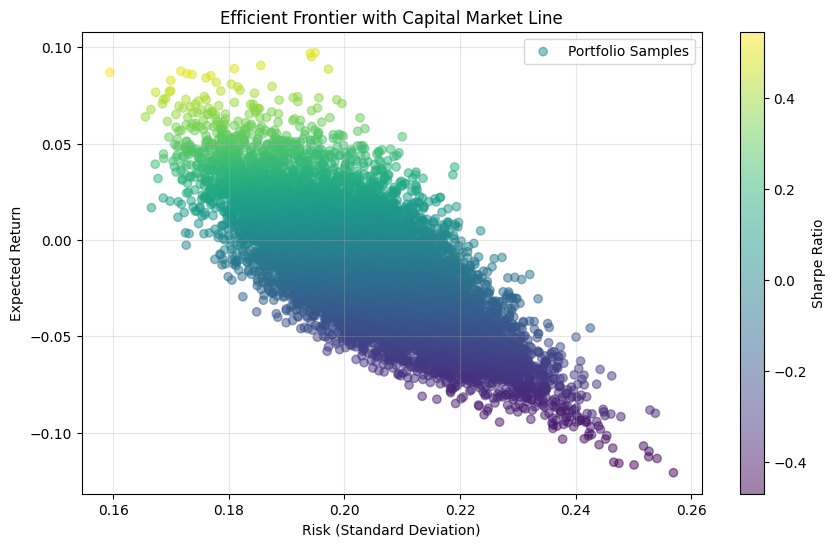

In [411]:
# Create the plot
plt.figure(figsize=(10, 6))

# Plot random portfolios
scatter = plt.scatter(results[1, :], results[0, :], 
                     c=results[2, :], 
                     cmap='viridis', 
                     alpha=0.5, 
                     label='Portfolio Samples')

# Plot efficient frontier
#plt.plot(frontier_risks, frontier_returns, 
#         color='blue', 
#         linewidth=2, 
#         label='Efficient Frontier')

# Plot CML
#plt.plot(x_cml, y_cml, 
# color='red', 
#         linestyle='--', 
#         label='Capital Market Line (CML)')

# Plot maximum Sharpe ratio point
#plt.scatter(max_sharpe_stddev, max_sharpe_return, 
#           color='red', 
#           marker='*', 
#           s=200, 
#           label='Maximum Sharpe ratio')

# Plot minimum variance point
#plt.scatter(min_var_risk, min_var_return, 
#           color='orange', 
#           marker='o', 
#           s=200, 
#           label='Minimum Variance')

plt.colorbar(scatter, label='Sharpe Ratio')
plt.xlabel('Risk (Standard Deviation)')
plt.ylabel('Expected Return')
plt.title('Efficient Frontier with Capital Market Line')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3)
plt.show()



Text(0, 0.5, 'Expected Return')

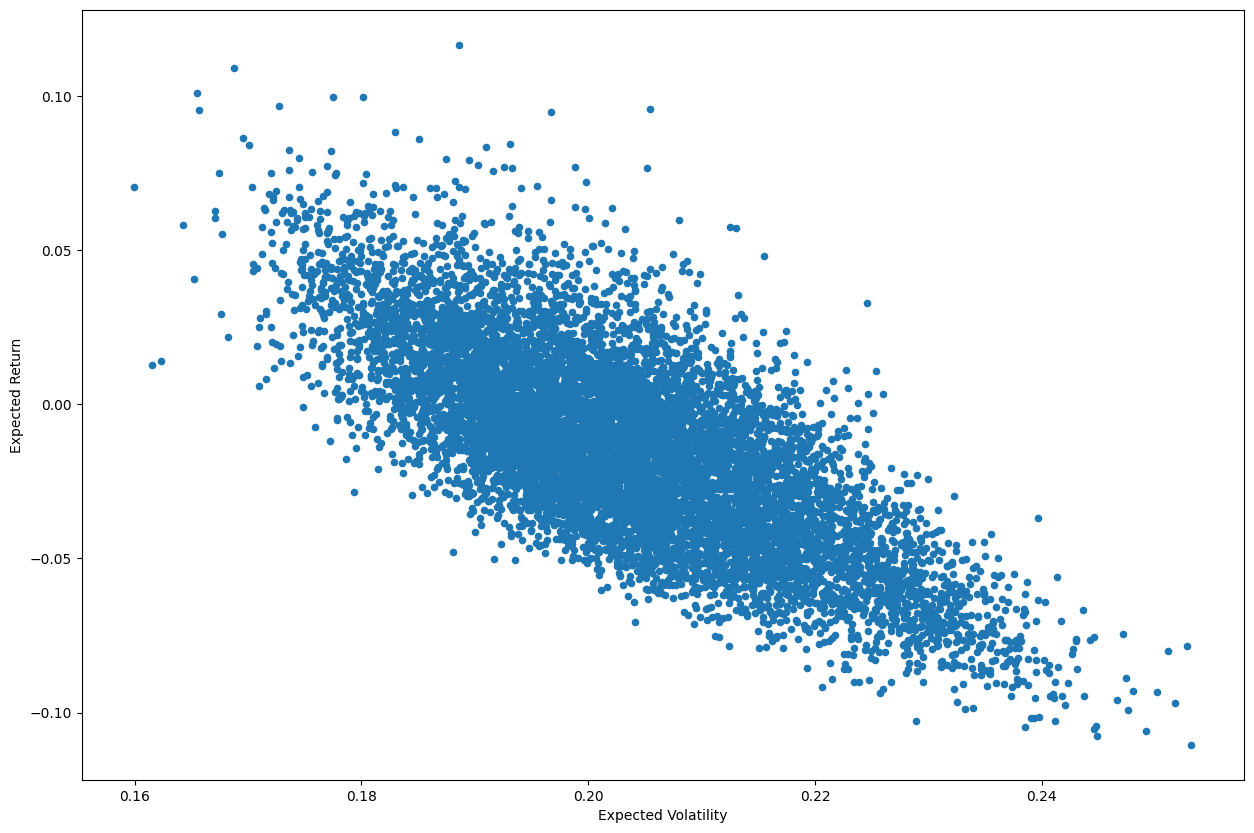

In [379]:
portfolios = pd.DataFrame({'Return': results[0, ], 'Volatility':results[1, ]})
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(15,10));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

C:\Users\Uzivatel\AppData\Local\Temp\ipykernel_18628\3071231635.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(f"Stock {i+1}", (beta[i], expected_returns[i]))


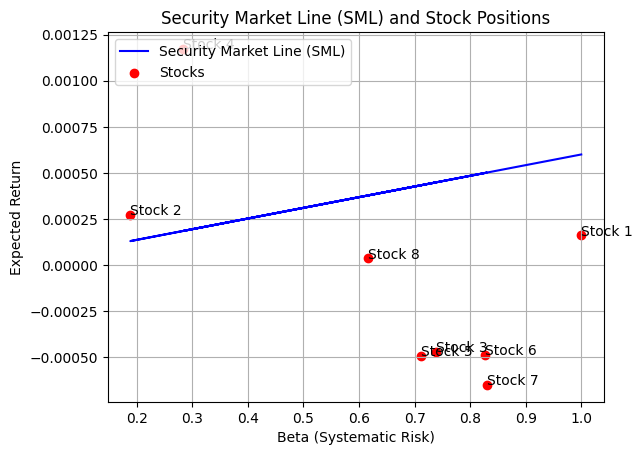

In [380]:
# Assume 'market_return' is the market's return (you can use a relevant benchmark like the S&P 500)
beta = covariance_matrix.iloc[:, 0] / covariance_matrix.iloc[0, 0]  # Simplified calculation using first stock as market proxy
expected_market_return = 0.0006  # Assumed daily expected market return (about 15% annually) ???
sml = risk_free_rate_one + beta * (expected_market_return - risk_free_rate_one)  # SML formula

# Plot the SML
plt.plot(beta, sml, label="Security Market Line (SML)", color='blue')

# Plot individual stocks based on their expected returns and betas
plt.scatter(beta, expected_returns, color='red', label="Stocks")
for i, txt in enumerate(expected_returns):
    plt.annotate(f"Stock {i+1}", (beta[i], expected_returns[i]))

# Labels and title
plt.title("Security Market Line (SML) and Stock Positions")
plt.xlabel("Beta (Systematic Risk)")
plt.ylabel("Expected Return")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

In [ ]:
#Youtube video
#################################################################################
def portfolioPerformance(weights, meanReturns, covMatrix, Time): #Time in days I guess
    returns = np.sum(meanReturns*weights)*Time
    std = np.sqrt( np.dot(weights.T, np.dot(covMatrix, weights)) ) * np.sqrt(Time)
    return returns, std

weights = np.random.random(len(returns.columns))
weights /= np.sum(weights)

returns['portfolio'] = returns.dot(weights)
##############################################################################

def historicalVaR(returns, alpha=5):
    """
    Read in a pandas dataframe of returns / a pandas series of returns
    Output the percentile of the distribution at the given alpha confidence level
    """
    if isinstance(returns, pd.Series):
        return np.percentile(returns, alpha)

    # A passed user-defined-function will be passed a Series for evaluation.
    elif isinstance(returns, pd.DataFrame):
        return returns.aggregate(historicalVaR, alpha=alpha)

    else:
        raise TypeError("Expected returns to be dataframe or series")

def historicalCVaR(returns, alpha=5):
    """
    Read in a pandas dataframe of returns / a pandas series of returns
    Output the CVaR for dataframe / series
    """
    if isinstance(returns, pd.Series):
        belowVaR = returns <= historicalVaR(returns, alpha=alpha)
        return returns[belowVaR].mean()

    # A passed user-defined-function will be passed a Series for evaluation.
    elif isinstance(returns, pd.DataFrame):
        return returns.aggregate(historicalCVaR, alpha=alpha)

    else:
        raise TypeError("Expected returns to be dataframe or series")

# 100 days
Time = 100

hVaR = -historicalVaR(returns['portfolio'], alpha=5)*np.sqrt(Time)
hCVaR = -historicalCVaR(returns['portfolio'], alpha=5)*np.sqrt(Time)
pRet, pStd = portfolioPerformance(weights, meanReturns, covMatrix, Time)

InitialInvestment = 10000
print('Expected Portfolio Return:      ', round(InitialInvestment*pRet,2))
print('Value at Risk 95th CI    :      ', round(InitialInvestment*hVaR,2))
print('Conditional VaR 95th CI  :      ', round(InitialInvestment*hCVaR,2))

# The Markowitz Model

We have choosen strategy of min risk, min expected returns = 6 % p.a, the historical/empirical data was used.

#TODO: Try different estimation methods

In [382]:
def calculate_minimum_risk_portfolio(combined_returns, min_return, risk_free_rate):
    """
    Minimize portfolio risk subject to a minimum expected return, considering the risk-free rate.
    
    Parameters:
    combined_returns (pd.DataFrame): DataFrame with asset returns (stocks as columns).
    min_return (float): Minimum expected return (daily).
    risk_free_rate (float): The risk-free rate (daily), assumed constant over time.

    Returns:
    dict: Portfolio weights and resulting risk/return.
    """
    # Init characteristics
    expected_returns = combined_returns.mean() - risk_free_rate  # Adjust expected returns for the risk-free rate
    covariance_matrix = combined_returns.cov()
    num_assets = len(expected_returns)
    
    # Initial guess for weights
    initial_weights = np.ones(num_assets) / num_assets
    
    # Constraints: Weights sum to 1, portfolio return >= min_return
    constraints = [
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},  # Sum of weights = 1
        {'type': 'ineq', 'fun': lambda w: np.dot(w, expected_returns) - min_return}  # Portfolio return >= min_return
    ]
    
    # Bounds for weights (0 to 1)
    bounds = [(0, 1) for _ in range(num_assets)]
    
    # Objective function: Portfolio risk (standard deviation)
    def portfolio_risk(w):
        return np.sqrt(np.dot(w.T, np.dot(covariance_matrix, w)))
    
    # Minimize portfolio risk
    resultMark = minimize(portfolio_risk, initial_weights, constraints=constraints, bounds=bounds)
    
    # Check if optimization was successful
    if not resultMark.success:
        raise ValueError("Optimization failed:", resultMark.message)
    
    # Portfolio weights, risk, and return
    weights = resultMark.x
    portfolio_return = np.dot(weights, expected_returns) + risk_free_rate  # Adjust portfolio return back to actual return
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    
    return {
        'weights': dict(zip(combined_returns.columns, weights)),
        'portfolio_return': portfolio_return,
        'portfolio_risk': portfolio_risk
    }


In [385]:
# Example usage:
# Replace `stock_data` with your data (a dictionary of DataFrames with 'Close' prices for each stock)
# Set a minimum daily return (e.g., 0.00023 for ~6% annual return)
min_return = 0.00023
resultMark = calculate_minimum_risk_portfolio(combined_returns_subset, min_return, risk_free_rate_one)

In [386]:
# Print optimal portfolio weights and performance
print("Optimal Portfolio Weights:", resultMark['weights'])
print(f"Portfolio Expected Return: {resultMark['portfolio_return']}")
print(f"Portfolio Risk (Std Dev): {resultMark['portfolio_risk']}")
print(sum(resultMark['weights'].values()))

Optimal Portfolio Weights: {'GOOGL': 0.14339026830953988, 'AMGN': 0.5612353882652599, 'AVGO': 8.131516293641283e-19, 'DLTR': 0.14051810606912074, 'ISRG': 2.222614453595284e-18, 'LULU': 0.005953148116239213, 'QCOM': 1.0787811616230769e-17, 'TXN': 0.14890308923984036}
Portfolio Expected Return: 0.00034457656361773026
Portfolio Risk (Std Dev): 0.009517652379111759
1.0


Optimization failed for target return 0.0006. Skipping.


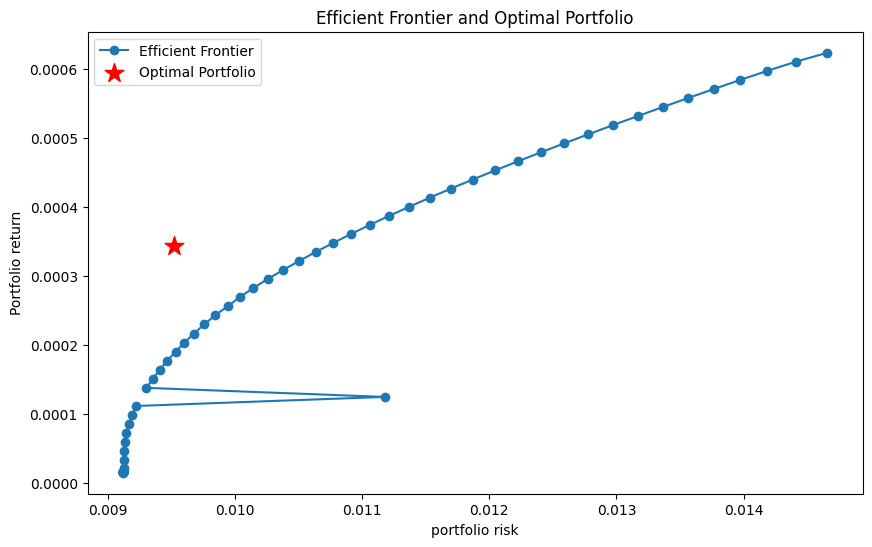

In [393]:
# Visualization: Efficient Frontier
market_return = resultMark['portfolio_return']
market_risk = resultMark['portfolio_risk']
num_portfolios = 100
results = np.zeros((3, num_portfolios))
# Get max and min expected returns to ensure feasible minimum return
min_expected_return = combined_returns.mean().min()
max_expected_return = combined_returns.mean().max()
for i in range(num_portfolios):
    # Vary the expected return for each portfolio
    min_return = min_expected_return + (i / num_portfolios) * (max_expected_return - min_expected_return)
    
    try:
        portfolio = calculate_minimum_risk_portfolio(combined_returns, min_return, risk_free_rate_one)
        results[0, i] = portfolio['portfolio_risk']
        results[1, i] = portfolio['portfolio_return']
    except ValueError as e:
        # Handle cases where optimization fails
        print(f"Optimization failed for target return {min_return:.4f}. Skipping.")
        results[0, i] = np.nan
        results[1, i] = np.nan


# Plot CML (opacko from above, still not working)
# ??? How to choose market risk and market returns
cml_x = np.linspace(0, market_risk * 1.5, 100)
cml_y = risk_free_rate_one + (cml_x / market_risk) * (market_return - risk_free_rate_one)
# Plot efficient frontier
plt.figure(figsize=(10, 6))
plt.plot(results[0, :], results[1, :], marker='o', label='Efficient Frontier')
#plt.plot(cml_x, cml_y, color='green', label='Capital Market Line (CML)') (same naprd results)
plt.scatter(resultMark['portfolio_risk'], resultMark['portfolio_return'], color='red', marker='*', s=200, label='Optimal Portfolio')
plt.title('Efficient Frontier and Optimal Portfolio')
plt.xlabel('portfolio risk')
plt.ylabel('Portfolio return')
plt.legend(loc='best')
plt.show()

# Out-Of-Sample Investing

In [347]:
# Function to calculate the fixed tangency portfolio (Sharpe-maximizing portfolio)
def calculate_tangency_portfolio(returns, risk_free_rate_cleaned):
    # Get expected returns and covariance matrix
    expected_returns = returns.mean()
    covariance_matrix = returns.cov()
    
    # Risk-free rate (example, you can adjust based on your context)
    risk_free_rate = risk_free_rate_cleaned.mean()
    
    # Calculate excess returns (subtract risk-free rate)
    excess_returns = expected_returns - risk_free_rate
    
    # Ensure the excess returns vector has the same shape as the covariance matrix
    excess_returns = excess_returns[:covariance_matrix.shape[0]]  # Trim excess returns to match the covariance matrix shape
    
    # Calculate weights using the inverse of the covariance matrix
    weights = np.linalg.inv(covariance_matrix).dot(excess_returns)
    
    # Normalize weights to sum to 1
    weights = weights / np.sum(weights)
    
    # Calculate portfolio return and risk
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_risk = np.sqrt(np.dot(weights.T, np.dot(covariance_matrix, weights)))
    
    return {'weights': weights, 'portfolio_return': portfolio_return, 'portfolio_risk': portfolio_risk}
    
    return {'weights': weights, 'portfolio_return': portfolio_return, 'portfolio_risk': portfolio_risk}

# Example of daily investment strategy
def simulate_strategy(stock_data, min_return, start_date, end_date, risk_free_rate_cleaned):
    # Filter data for the given date range
    stock_data = stock_data.loc[start_date:end_date]
    
    # Store results
    portfolio_values_optimal = []
    portfolio_values_naive = []
    portfolio_values_tangency = []
    
    # Initialize the portfolio value (starting with $1)
    initial_value = 1
    portfolio_value_optimal = initial_value
    portfolio_value_naive = initial_value
    portfolio_value_tangency = initial_value
    
    # Simulate the investment over time
    for i in range(1, len(stock_data)):
        # Calculate returns up to the current date
        daily_returns = stock_data.iloc[:i]
        
        # Calculate optimal portfolio based on historical data
        optimal_portfolio = calculate_minimum_risk_portfolio(daily_returns, min_return)
        optimal_weights = optimal_portfolio['weights']
        
        # Naive portfolio (equal weights)
        num_assets = len(daily_returns.columns)
        naive_weights = np.ones(num_assets) / num_assets
        
        # Fixed tangency portfolio (based on entire data)
        tangency_portfolio = calculate_tangency_portfolio(daily_returns,risk_free_rate_cleaned)
        tangency_weights = tangency_portfolio['weights']
        
        # Calculate daily returns for each strategy
        daily_returns_optimal = np.dot(daily_returns.iloc[i], optimal_weights)
        daily_returns_naive = np.dot(daily_returns.iloc[i], naive_weights)
        daily_returns_tangency = np.dot(daily_returns.iloc[i], tangency_weights)
        
        # Update portfolio values
        portfolio_value_optimal *= (1 + daily_returns_optimal)
        portfolio_value_naive *= (1 + daily_returns_naive)
        portfolio_value_tangency *= (1 + daily_returns_tangency)
        
        # Store portfolio values
        portfolio_values_optimal.append(portfolio_value_optimal)
        portfolio_values_naive.append(portfolio_value_naive)
        portfolio_values_tangency.append(portfolio_value_tangency)
    
    # Convert results to a DataFrame
    results = pd.DataFrame({
        'Date': stock_data.index[1:],
        'Optimal Portfolio Value': portfolio_values_optimal,
        'Naive Portfolio Value': portfolio_values_naive,
        'Tangency Portfolio Value': portfolio_values_tangency
    })
    
    return results


In [348]:
# Simulate the strategy for a given date range
start_date = '2022-10-25'
end_date = '2024-10-24'
min_return = 0.00023  # Example minimum daily return (~6% annual return)

# Simulate the strategy and get the results
portfolio_results = simulate_strategy(combined_returns_cleaned, min_return, start_date, end_date, risk_free_rate_cleaned)

# Plot the portfolio values over time
plt.figure(figsize=(10, 6))
plt.plot(portfolio_results['Date'], portfolio_results['Optimal Portfolio Value'], label='Optimal Strategy')
plt.plot(portfolio_results['Date'], portfolio_results['Naive Portfolio Value'], label='Naive Strategy')
plt.plot(portfolio_results['Date'], portfolio_results['Tangency Portfolio Value'], label='Tangency Portfolio')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.title('Portfolio Performance Comparison')
plt.legend()
plt.show()

# Print the final portfolio values and compare them
final_optimal_value = portfolio_results['Optimal Portfolio Value'].iloc[-1]
final_naive_value = portfolio_results['Naive Portfolio Value'].iloc[-1]
final_tangency_value = portfolio_results['Tangency Portfolio Value'].iloc[-1]

print(f"Final Optimal Portfolio Value: {final_optimal_value}")
print(f"Final Naive Portfolio Value: {final_naive_value}")
print(f"Final Tangency Portfolio Value: {final_tangency_value}")

IndexError: single positional indexer is out-of-bounds